In [6]:
!git clone https://github.com/thequang05/testtt.git

Cloning into 'testtt'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 77 (delta 43), reused 15 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (77/77), 24.28 KiB | 3.47 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [7]:
!cp -r /kaggle/input/data-set-vehicle/* ./

In [1]:
import yaml
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

In [2]:
import numpy as np
import pandas as pd

In [10]:
import sys
import os


package_path = '/kaggle/working/testtt'

sys.path.append(package_path)

# Kiểm tra xem đã nhận chưa
print(os.listdir(package_path))

['README.md', '.git', '.DS_Store', 'model_detection']


In [ ]:
data_config = {
    'path': '/kaggle/working',  # Đường dẫn gốc (quan trọng cho YOLOv8)
    'train': '/kaggle/working/train/images',
    'val': '/kaggle/working/valid/images',
    'test': '/kaggle/working/test/images', # Nếu có
    
   
    'nc': 8,
    
    
    'names': ['0', '1', '2', '3', 'bus', 'car', 'motor', 'truck']
}

with open('/kaggle/working/data.yaml', 'w') as f:
    yaml.dump(data_config, f)

In [12]:
from model_detection.data.data_preprocessor import load_data_set,verify_image_label_pairs,compute_dataset_stats,clip_and_fix_boxes,remap_yolo_labels,visualize_image_with_bbox,get_one_image_per_class
from model_detection.model.model_trainer import load_training_config,train_model,valid_model
from model_detection.model.yolo_detector import YOLODetector

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [13]:
data_yaml_path = '/kaggle/working/data.yaml'
data_set = load_data_set(data_yaml_path)
print(data_set)
print("Dataset loaded successfully!")
print("Train images:", data_set['train_images'])
print("Validation images:", data_set['val_images'])
print("Class names:", data_set['names'])
print("Number of classes:", data_set['nc'])
print(compute_dataset_stats(data_set['train_images'],data_set['train_labels']))
print(verify_image_label_pairs(data_set['train_images'],data_set['train_labels']))

{'train_images': '/kaggle/working/train/images', 'val_images': '/kaggle/working/valid/images', 'test_images': '/kaggle/working/test/images', 'names': ['0', '1', '2', '3', 'bus', 'car', 'motor', 'truck'], 'nc': 8, 'train_labels': '/kaggle/working/train/labels', 'val_labels': '/kaggle/working/valid/labels', 'test_labels': '/kaggle/working/test/labels'}
Dataset loaded successfully!
Train images: /kaggle/working/train/images
Validation images: /kaggle/working/valid/images
Class names: ['0', '1', '2', '3', 'bus', 'car', 'motor', 'truck']
Number of classes: 8
{'num_images': 1235, 'num_labels': 5795, 'classes': [0, 1, 2, 3, 4, 5, 6, 7], 'labels_per_class': {0: 1343, 1: 206, 2: 197, 3: 126, 6: 1583, 7: 1224, 5: 918, 4: 198}, 'small_boxes': 2286, 'small_box_ratio': 0.39447799827437446}
[]


In [14]:
remap_yolo_labels(
    [data_set['train_labels']],id_map={5: 0, 6: 1, 7: 2, 4: 3}
)
remap_yolo_labels(
    [data_set['val_labels']],id_map={5: 0, 6: 1, 7: 2, 4: 3}    
)
remap_yolo_labels(
    [data_set['test_labels']],id_map={5: 0, 6: 1, 7: 2, 4: 3}
)

✅ Đã cập nhật 1235 file label.
⚠️ Các ID không có trong mapping (không được đổi): {0, 1, 2, 3}
✅ Đã cập nhật 156 file label.
⚠️ Các ID không có trong mapping (không được đổi): {0, 1, 2, 3}
✅ Đã cập nhật 156 file label.
⚠️ Các ID không có trong mapping (không được đổi): {0, 1, 2, 3}


In [16]:
data_config = {
    'path': '/kaggle/working',  # Đường dẫn gốc (quan trọng cho YOLOv8)
    'train': '/kaggle/working/train/images',
    'val': '/kaggle/working/valid/images',
    'test': '/kaggle/working/test/images', # Nếu có
    
    
    'nc': 4,
    'names': ['car', 'motor', 'truck','bus']
}

# Ghi file yaml
with open('/kaggle/working/data.yaml', 'w') as f:
    yaml.dump(data_config, f)

In [17]:
data_yaml_path = '/kaggle/working/data.yaml'
data_set = load_data_set(data_yaml_path)
print("Class names:", data_set['names'])
print("Number of classes:", data_set['nc'])
print(compute_dataset_stats(data_set['train_images'],data_set['train_labels']))
print(verify_image_label_pairs(data_set['train_images'],data_set['train_labels']))

Class names: ['car', 'motor', 'truck', 'bus']
Number of classes: 4
{'num_images': 1235, 'num_labels': 5795, 'classes': [0, 1, 2, 3], 'labels_per_class': {0: 2261, 1: 1789, 2: 1421, 3: 324}, 'small_boxes': 2286, 'small_box_ratio': 0.39447799827437446}
[]


  Class 0: car
  Class 1: motor
  Class 2: truck
  Class 3: bus
Visualizing Class 0: car


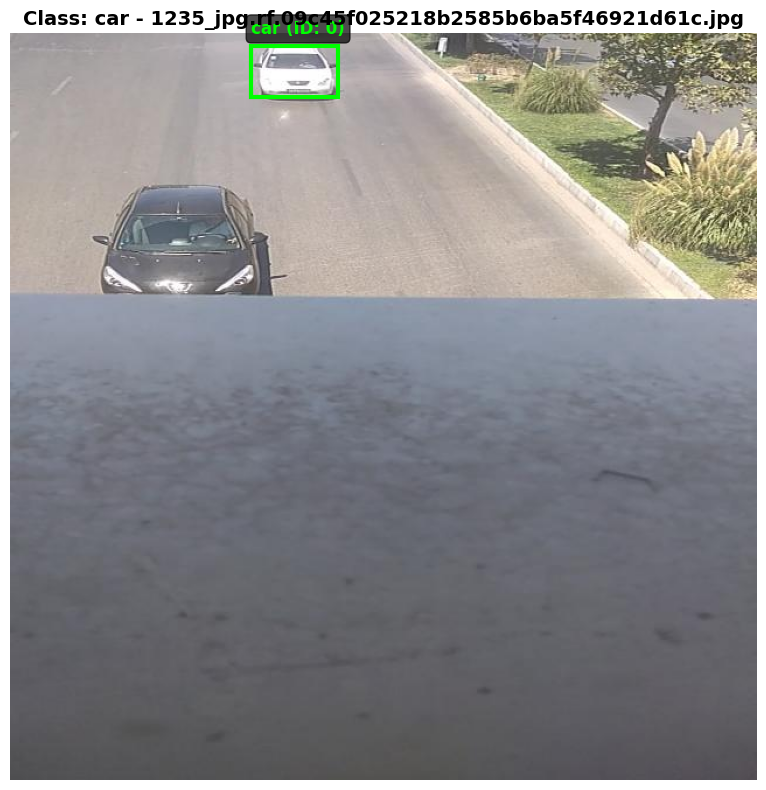

Visualizing Class 1: motor


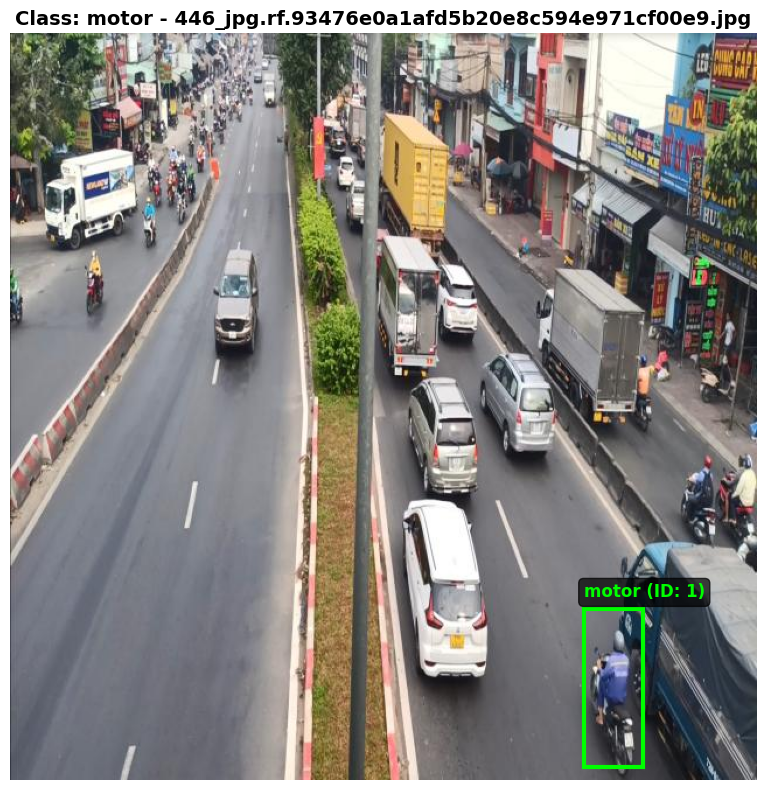

Visualizing Class 2: truck


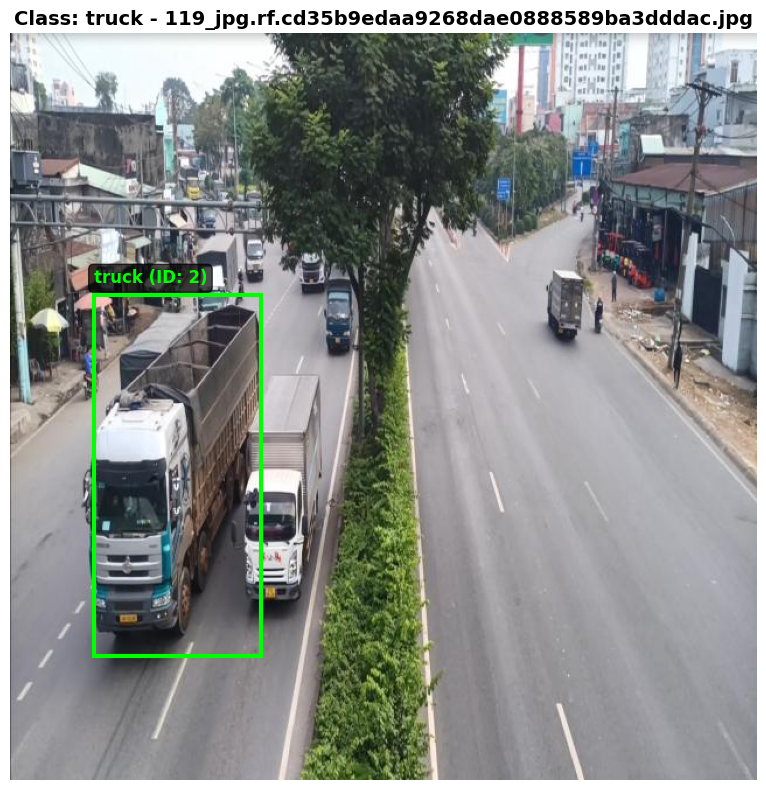

Visualizing Class 3: bus


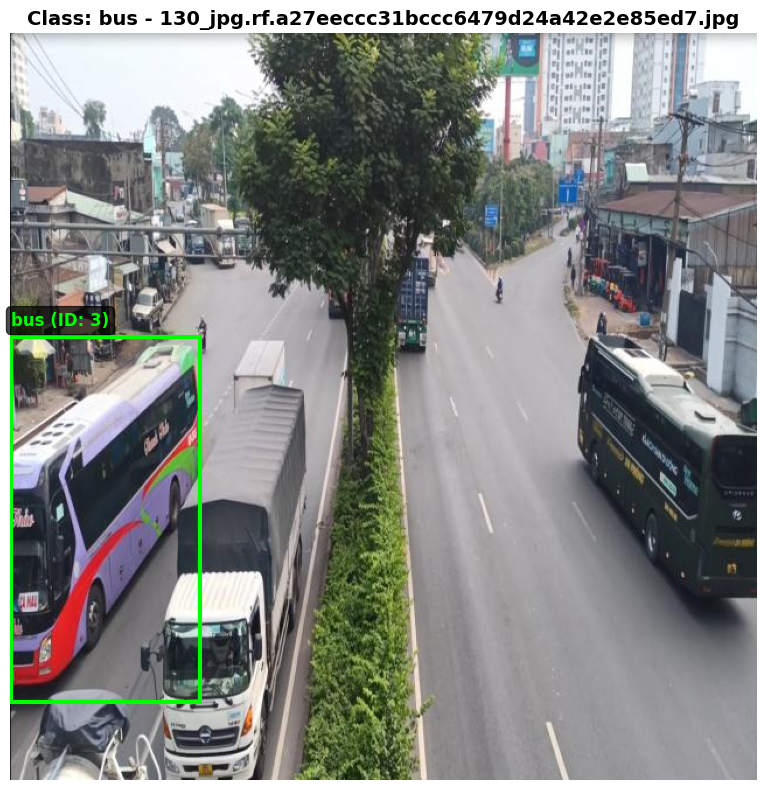

In [18]:
class_samples=get_one_image_per_class(data_set['train_images'],data_set['train_labels'],data_set['names'])
for cls_id in sorted(class_samples.keys()):
    print(f"  Class {cls_id}: {data_set['names'][cls_id] if cls_id < len(data_set['names']) else 'Unknown'}")

for cls_id in sorted(class_samples.keys()):
    image_path, label_path, bbox_line = class_samples[cls_id]
    print(f"Visualizing Class {cls_id}: {data_set['names'][cls_id] if cls_id < len(data_set['names']) else 'Unknown'}")
    visualize_image_with_bbox(image_path, label_path, bbox_line, data_set['names'])


In [ ]:
MODEL='yolov8m.pt'
TRAINING_CONFIG_PATH = '/kaggle/working/testtt/model_detection/configs/training_config.yaml'
DATA_YAML_PATH='/kaggle/working/data.yaml'
best_model=train_model(weights=MODEL,training_config_path=TRAINING_CONFIG_PATH)

In [2]:
def show_image(image_path, title="Image", figsize=(10, 10)):
    if os.path.exists(image_path):
        img = Image.open(image_path)
        plt.figure(figsize=figsize)
        plt.imshow(img)
        plt.axis('off') # Tắt trục tọa độ cho đẹp
        plt.title(title, fontsize=14, fontweight='bold')
        plt.show()
    else:
        print(f"Không tìm thấy file: {image_path}")

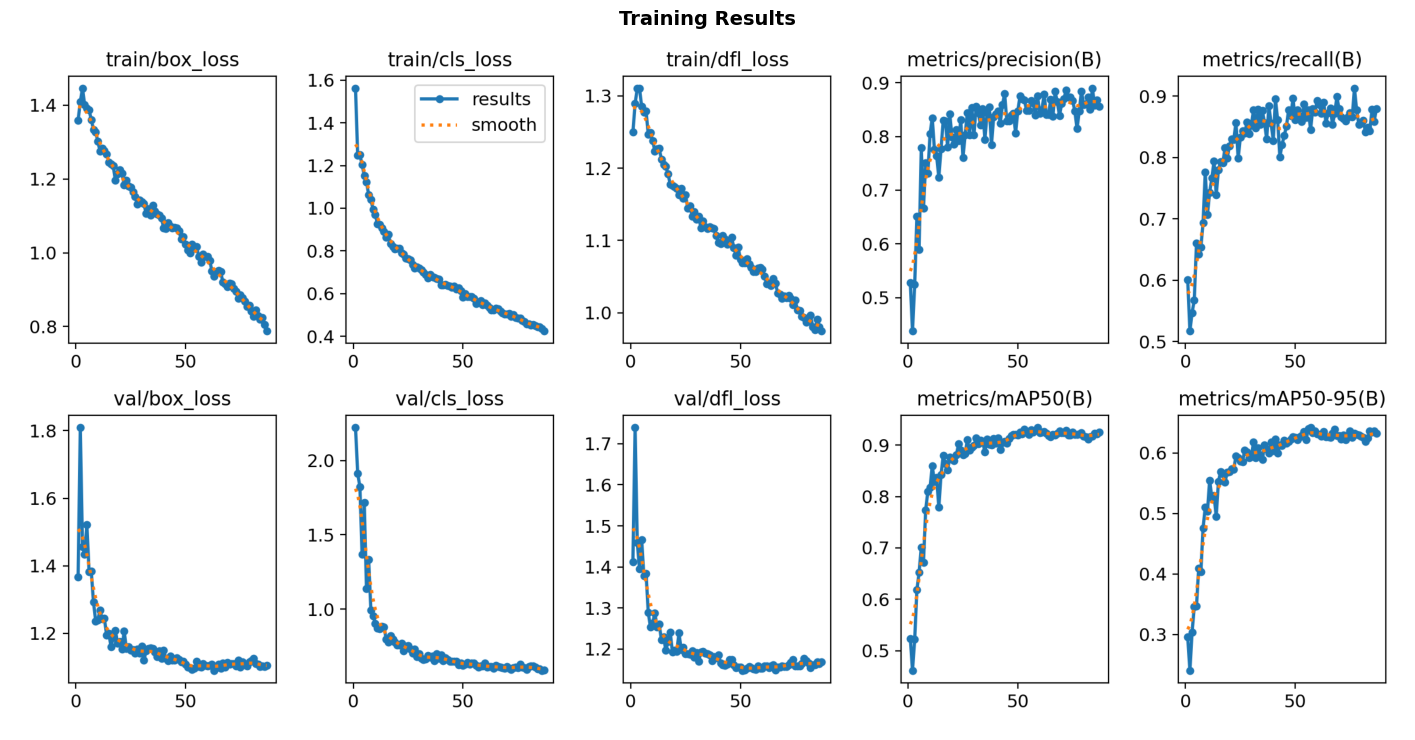

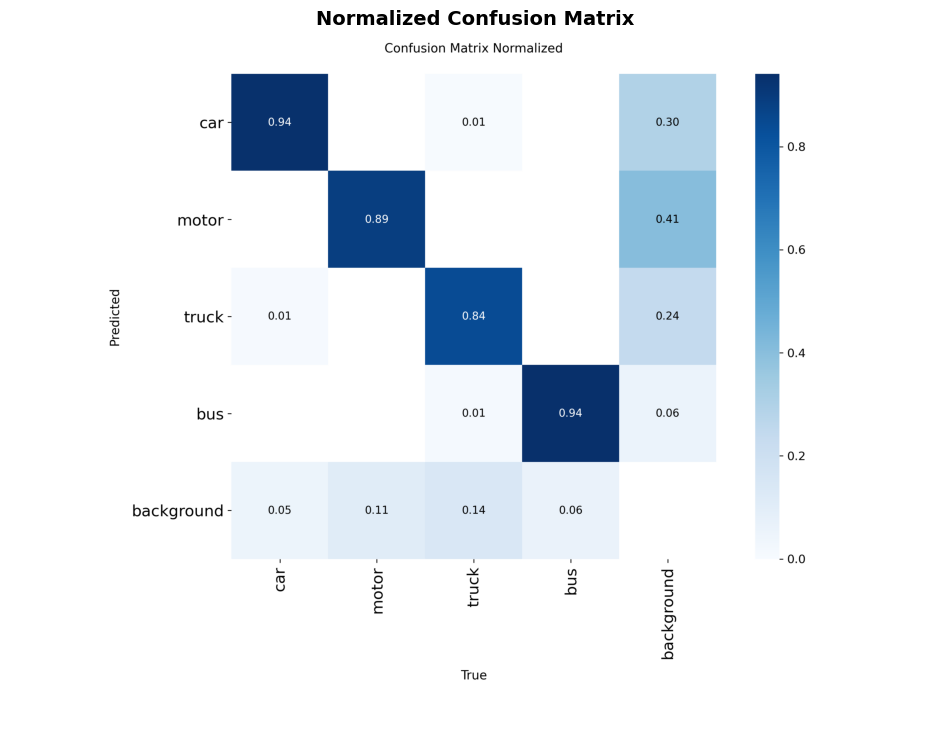

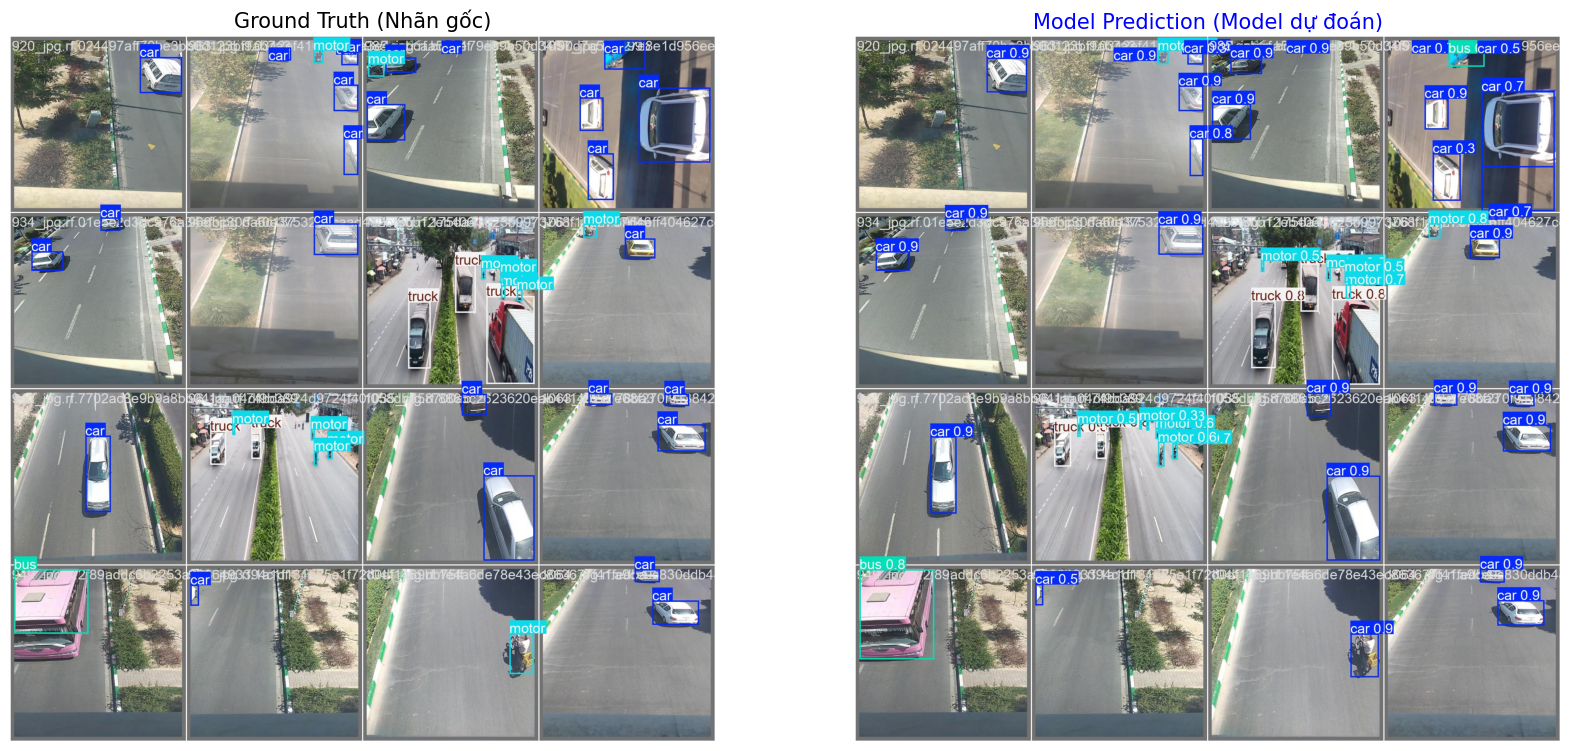

In [6]:
train_dir = 'runs/detect/train'
show_image(os.path.join(train_dir, 'results.png'), "Training Results", figsize=(18, 10))
show_image(os.path.join(train_dir, 'confusion_matrix_normalized.png'), "Normalized Confusion Matrix", figsize=(12, 10))
val_pred_path = os.path.join(train_dir, 'val_batch0_pred.jpg')
val_label_path = os.path.join(train_dir, 'val_batch0_labels.jpg')
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(Image.open(val_label_path))
axes[0].set_title("Ground Truth (Nhãn gốc)", fontsize=15)
axes[0].axis('off')  
axes[1].imshow(Image.open(val_pred_path))
axes[1].set_title("Model Prediction (Model dự đoán)", fontsize=15, color='blue')
axes[1].axis('off')
plt.show()

In [ ]:

model = YOLO('runs/detect/train/weights/best.pt')

metrics = model.val(data='/Users/koiita/Downloads/traffic_yolo_detect/data/data_set/data.yaml',conf=0.45, verbose=False) 
    
print(f"mAP@0.5:    {metrics.box.map50:.4f} ({metrics.box.map50*100:.2f}%)")
print(f"mAP@0.5-95: {metrics.box.map:.4f}  ({metrics.box.map*100:.2f}%)")
print(f"Precision:  {metrics.box.mp:.4f}")
print(f"Recall:     {metrics.box.mr:.4f}")
cm = metrics.confusion_matrix.matrix
    
names = metrics.names
class_metrics = []

for i, class_name in names.items():
    tp = cm[i, i]

    fn = np.sum(cm[i, :]) - tp       
    fp = np.sum(cm[:, i]) - tp
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0    
    class_metrics.append({
            'Class': class_name,
            'True Positives (TP)': int(tp),
            'False Positives (FP)': int(fp),
            'False Negatives (FN)': int(fn),
            'Precision': round(precision, 3),
            'Recall': round(recall, 3)
        })

    df = pd.DataFrame(class_metrics)

    print(df.to_string(index=False))
    #a

Ultralytics 8.3.232 🚀 Python-3.12.7 torch-2.9.1 CPU (Apple M1)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 210.3±97.0 MB/s, size: 57.1 KB)
val: Scanning /Users/koiita/Downloads/traffic_yolo_detect/data/data_set/valid/labels.cache... 156 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 156/156 361.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 14.7s/it 2:275.8s
                   all        156        703       0.87      0.843      0.888      0.658
Speed: 1.7ms preprocess, 934.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /Users/koiita/Downloads/traffic_yolo_detect/runs/detect/val11
mAP@0.5:    0.8883 (88.83%)
mAP@0.5-95: 0.6582  (65.82%)
Precision:  0.8703
Recall:     0.8426
Class  True Positives (TP)  False Positives (FP)  False Negatives (FN)  Precision  Recall
  car                  253    